In [32]:
from os import listdir, path
from os.path import isfile, join
import re
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def read_particles_file(file_path):
    with open(file_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            threads_number = float(row['threads_number'])
            average = float(row['average'])
            yield threads_number, average


def read_data(particles_file_pattern, dir_path='.'):
    x_threads = []
    x_particles = []
    y_average = []
    for f in listdir(dir_path):
        f = join(dir_path, f)
        if isfile(f):
            match = re.match(particles_file_pattern, path.basename(f))
            if match is None:
                continue
            particles = int(match.group(1))
            for (threads_number, average) in read_particles_file(f):
                x_threads.append(int(threads_number))
                x_particles.append(int(particles))
                y_average.append(float(average))
    return x_threads, x_particles, y_average


In [33]:
particles_file_pattern = r'particles_(\d+)'

x_threads, x_particles, y_average = read_data(particles_file_pattern)

import pandas as pd

df = pd.DataFrame({'threads': x_threads, 'particles': x_particles,'time': y_average})
df = df.sort_values(['threads', 'particles'])
with pd.option_context('display.max_rows', 100, 'display.max_columns', 5):
    print(df)


    particles  threads         time
10     100000        5   135.733333
32   10000000       10  7108.033333
0      100000       15    46.422222
4      100000       25    27.880000
2      100000       35    20.171429
3      100000       50    13.926667
58     500000       50    70.480000
13    1000000       50   140.106667
24   10000000       50  1393.319728
69   50000000       50  9423.852309
8      100000       65    10.897436
6      100000       85    11.929412
5      100000      100     7.946667
60     500000      100    35.223333
16    1000000      100    69.240000
27   10000000      100   696.006667
72   50000000      100  3525.525863
7      100000      150     5.664444
61     500000      150    23.613333
14    1000000      175    39.820952
25   10000000      175   397.460952
70   50000000      175  2029.827586
9      100000      200     4.605000
65     500000      200    17.611667
1      100000      250     3.389333
57     500000      250    14.101333
11    1000000      250    29

In [34]:
def func(X, a, b):
    threads, particles = X
    return a * (1 / threads) * b * particles

In [35]:
popt, pcov = curve_fit(func, (x_threads, x_particles), y_average)
popt

array([-0.34198527, -0.02325793])

In [36]:
def estimate(threads, particles):
    return popt[0] * (1 / threads) + popt[1] * particles


In [37]:
particles_file_pattern_test = r'control_particles_(\d+)'

x_threads_test, x_particles_test, y_average_test = read_data(particles_file_pattern_test)

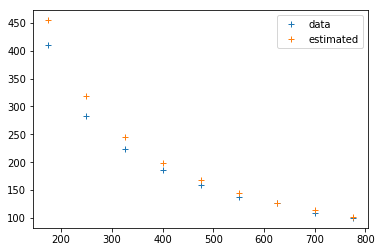

In [38]:
estimated_result = [func((x, y), popt[0], popt[1]) for x, y in zip(x_threads_test, x_particles_test)]

plt.plot(x_threads_test, y_average_test, '+', label='data')
plt.plot(x_threads_test, estimated_result, '+', label='estimated')

plt.legend()
plt.show()
